In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def _getInitValues(num,dim=2,mini=-100,maxi=100):
    centroids = []
    if mini > maxi:
        raise ValueError('maxi should be greater than mini')
    else:
        for i in range(num):
            meanBtw = (maxi - mini)/ 2 + mini
            distance = maxi - meanBtw
            result = (np.random.rand(dim) - 0.5) * distance * 2 + meanBtw
            centroids.append(result)
        centroids = np.array([list(i) for i in centroids])
        return centroids

In [12]:
a.shape

(10, 2)

In [13]:
np.zeros(a.shape)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

# Sample Data

In [14]:
data = np.loadtxt("sample_2d_data.txt")

In [280]:
init = _getInitValues(3,dim=2,mini=10,maxi=40)
km = kMeans(data=data,initCentroids=init)

In [281]:
init

array([[38.02619593, 11.99276666],
       [39.00451973, 37.00352774],
       [14.20799667, 21.16715581]])

In [282]:
km.getBestCentroidAll(init)
    

In [283]:
sum(km.r)

array([ 29., 118.,   3.])

In [284]:
km.meanCluster()

In [285]:
summutation = np.dot(km.data.transpose(),km.r)

In [286]:
summutation

array([[ 925.        , 2326.39644659,   94.        ],
       [ 932.        , 1878.24094778,   71.        ]])

In [279]:
sum(km.r)

array([  7., 143.,   0.])

In [287]:
km.centroids 

array([[31.89655172, 32.13793103],
       [19.71522412, 15.91729617],
       [31.33333333, 23.66666667]])

In [288]:
km.initC

array([[38.02619593, 11.99276666],
       [39.00451973, 37.00352774],
       [14.20799667, 21.16715581]])

In [289]:
summutation.transpose().shape

(3, 2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[38.02619593 11.99276666]
 [39.00451973 37.00352774]
 [14.20799667 21.16715581]]
[[31.89655172 32.13793103]
 [19.71522412 15.91729617]
 [31.33333333 23.66666667]]


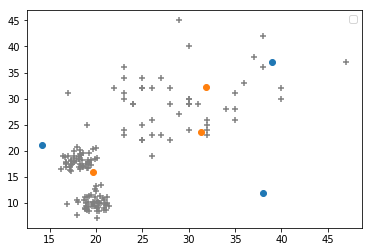

In [291]:
plt.scatter(data[:,0],data[:,1],color="gray",marker="+")
km.plot(init)
km.plot(km.centroids)

# test

In [306]:
class kMeans(object):
    def __init__(self,data,initCentroids):
        self.initC = initCentroids
        self.centroids = initCentroids
        self.numC = len(initCentroids)
        self.r = np.zeros([data.shape[0],self.initC.shape[0]])
        self.data = data
        self.dim = data.shape[1]

    #Expectation
    def getBestCentroidAll(self,centroids):
        #全データからセントロイドまでの距離を測り、最短のものを返す。
        pair = []
        self.r = np.zeros([data.shape[0],self.initC.shape[0]])
        for n_data in range(len(self.data)):
            iClu = self._getBestCentroid(one_data=data[n_data],centroids=centroids)
            #Rの更新を行う
            self.r[n_data,iClu-1] = 1
        return None

    
    def _getBestCentroid(self,one_data,centroids):
        #各点からセントロイドまでの距離を測って、最小のものを取り出す。
        tmp = []
        for j in range(len(centroids)):
            dis = self._distance(one_data,centroids[j])
            tmp.append(dis)
        result = min(tmp)
        index = tmp.index(result)
        return index

    def  _distance(self,arr,ini):
        return np.linalg.norm(np.abs(ini - arr))

    #Maximization
    def meanCluster(self):
        summutation = np.dot(self.data.transpose(),self.r)
        if not np.any(sum(self.r) == 0):
            centroids = (summutation / sum(self.r)).transpose()
            self.centroids = centroids
            return None
        else:
            print("error")
            #クラスタ内に一つもデータがない場合はそのクラスタの中心を不動にする
#             zero_ind = np.where(sum(self.r)==0)[0]
#             pre_centroids = centroids.transpose()[zero_ind]
            pass
            
    #display
    def plot(self,centroids,label=''):
        arr = arr = np.array([i for i in centroids])
        x = arr[:,0]
        y = arr[:,1]
        plt.plot(x,y,'o',label=label)
        print(centroids)
        plt.legend()

    #収束判定をするために、評価関数を作る
    def J(self):
        result = 0
        for n in range(len(self.data)):
            for k in range(len(self.centroids)):
                result += np.linalg.norm(self.data[n] - self.centroids[k])
        return result


[[15.65773664 15.12183533]
 [28.25418997 15.01089479]
 [11.2094003  17.81767582]]
[[29.57446809 29.46808511]
 [19.5        31.5       ]
 [18.97422224 14.19050443]]
[[22.41666667 29.83333333]
 [19.04352917 14.13109849]
 [31.16216216 29.62162162]]
[[19.04352917 14.13109849]
 [32.75862069 30.4137931 ]
 [23.6        28.6       ]]
[1000000, 5933.718086743958, 5817.9418431641]


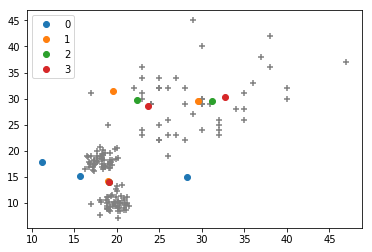

In [336]:
J = 1000000
Js = [J]
init = _getInitValues(3,mini=10,maxi=30)
km = kMeans(data=data, initCentroids=init)
plt.scatter(data[:,0],data[:,1],marker="+",color="gray")
km.plot(km.centroids,label=0)
for _iter in range(100):
    km.getBestCentroidAll(km.centroids)
    km.meanCluster()
    km.plot(km.centroids,label=_iter+1)
    if Js[-1] - km.J() <100:
        print(Js)
        break
    Js.append(km.J())

In [315]:
km.r

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [299]:
Js[-1]

1000000

In [294]:
l = [3,3,5,5,1]
l[-1]

1

In [235]:
km.centroids

array([[28.82957469, 19.86292208],
       [46.20483384, 12.0684333 ],
       [13.48235834, 11.60388698]])

In [231]:
np.dot(km.data.transpose(),km.r).transpose()

array([[  47.        ,   37.        ],
       [1798.41804227, 1310.38069211],
       [1499.97840432, 1533.86025567]])

[array([18.99017038, 27.32199854]), array([28.87475044, 19.5232781 ]), array([19.74480499, 10.3327569 ])]
[[22.224904945050454, 26.883294268906692], [32.07142857142857, 27.571428571428573], [19.118528983822554, 13.11245952740689]]


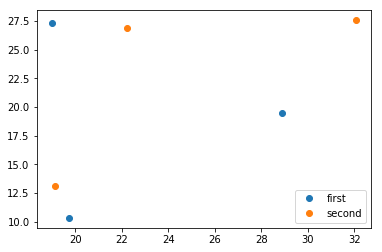

In [3]:
# if "__name__" == "__main__":
centroids = _getInitValues(3,mini=10,maxi=30)
data = np.loadtxt("sample_2d_data.txt")

pairs2 = getBestCentroidAll(data,centroids=centroids)
centroids2 = meanCluster(pairs2,numCl=3)
plot(centroids,"first")
plot(centroids2,"second")